In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [25]:
df = pd.read_csv('creditcard.csv')
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df['Time'].describe() #172792 sec = 47.99 hours

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [5]:
dfhours = df.copy()
dfhours['Time'] = dfhours['Time']*0.00027777777777778
dfhours.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,47.995000,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,47.995000,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,47.995278,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,47.995556,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,47.995833,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,47.996111,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,47.996389,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,47.996667,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,47.996667,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,47.997778,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
legit = 0
fraud = 0
for i in range(len(df['Class'])):
    if df.at[i, 'Class'] != 0:
        fraud = fraud+1
    else:
        legit = legit+1
        
total = fraud+legit
print("fraud: ", fraud, "-percentage: ", (fraud/total)*100, "%")
print("legit: ", legit, "-percentage: ", (legit/total)*100, "%")

fraud:  492 -percentage:  0.1727485630620034 %
legit:  284315 -percentage:  99.82725143693798 %


In [8]:
target_col = ['Class']
explicit_cols = ['Time', 'Amount']
V_cols = np.setdiff1d(df.columns, explicit_cols + target_col)
feature_cols = np.r_[V_cols, explicit_cols]

### about the corr function
check the correlation between the features. I used the deafualt function to calculate the corr (pearson).

x and y are two features.

(Σ(x{i}-x{avg})*(y{i}-y{avg}))/√(Σ(x{i}-x{avg})^2 *Σ(y{i}-y{avg})^2)

In [9]:
dfcorr = df.corr().copy()
dfcorr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


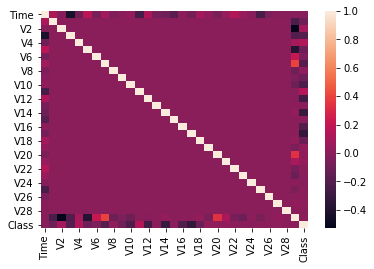

In [10]:
sns.heatmap(dfcorr)

In [11]:
dfcorr = dfcorr.sort_values(by='Class', ascending=False)
dfcorr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Class,-0.012323,-1.013473e-01,9.128865e-02,-1.929608e-01,1.334475e-01,-9.497430e-02,-4.364316e-02,-1.872566e-01,1.987512e-02,-9.773269e-02,...,4.041338e-02,8.053175e-04,-2.685156e-03,-7.220907e-03,3.307706e-03,4.455398e-03,1.757973e-02,9.536041e-03,0.005632,1.000000
V11,-0.247689,2.438580e-16,9.468995e-16,-5.501758e-17,-2.083600e-16,7.342759e-16,4.865799e-16,-1.084105e-15,1.954747e-16,4.682341e-16,...,-3.911893e-16,-3.811640e-17,2.232007e-16,1.219849e-15,-4.567635e-16,-1.110976e-16,-2.635827e-16,-3.091914e-16,0.000104,0.154876
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V21,0.044736,-1.755072e-16,8.444409e-17,-2.971969e-17,-9.976950e-17,-1.368701e-16,-1.575903e-16,1.938604e-16,-2.412439e-16,4.578389e-17,...,1.000000e+00,3.905948e-15,6.127323e-16,1.298254e-16,-2.826293e-16,-4.907301e-16,-1.033403e-15,5.132234e-16,0.105999,0.040413
V19,0.028975,1.818128e-16,9.528280e-17,2.576773e-16,-2.656938e-16,-3.138234e-16,2.717167e-16,-2.874017e-16,-5.339821e-16,1.120752e-16,...,4.032541e-16,-9.690436e-16,5.733798e-16,3.126716e-17,7.415355e-16,5.614354e-16,-1.113035e-16,-1.375843e-15,-0.056151,0.034783
V20,-0.050866,1.036959e-16,-9.309954e-16,-9.429297e-16,-3.223123e-16,2.076048e-16,1.898638e-16,1.744242e-16,-1.095534e-16,-4.340941e-16,...,-1.120828e-15,1.105842e-15,4.986739e-16,1.637488e-16,-1.518242e-16,-2.975081e-16,-1.446069e-15,-1.133579e-16,0.339403,0.020090
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V27,-0.005135,3.208233e-17,-4.478472e-16,6.239832e-16,-6.403423e-17,4.465960e-16,-2.623818e-16,-5.886825e-16,1.733633e-16,-2.287414e-16,...,-1.033403e-15,-1.294910e-16,5.524044e-16,-3.736529e-16,-6.107118e-16,-3.383861e-16,1.000000e+00,-3.770124e-16,0.028825,0.017580
V28,-0.009413,9.820892e-16,-3.676415e-16,7.726948e-16,-5.863664e-17,-3.299167e-16,4.813155e-16,-6.836764e-17,-4.484325e-16,9.146779e-16,...,5.132234e-16,-3.021376e-16,9.029821e-16,-2.259275e-16,3.399375e-16,-3.751403e-16,-3.770124e-16,1.000000e+00,0.010258,0.009536


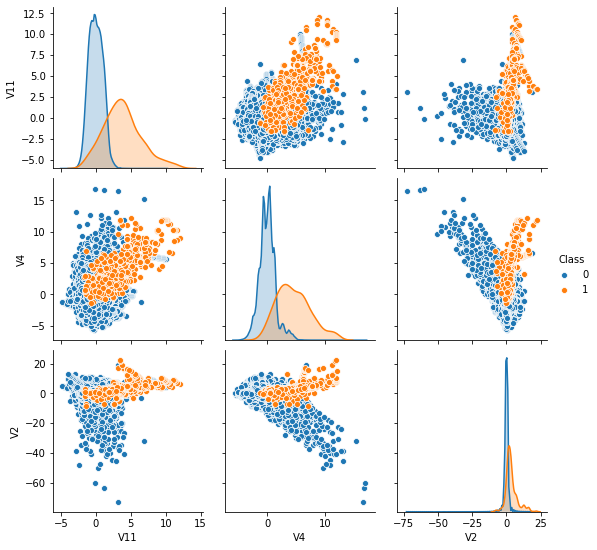

In [23]:
sns.pairplot(df, vars = ['V11', 'V4', 'V2'], hue = 'Class')

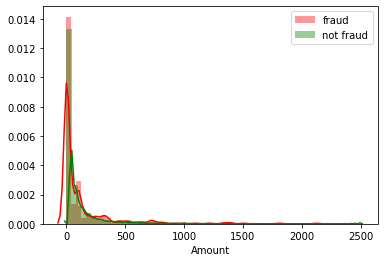

In [12]:
dffraud = df[df["Class"] == 1].copy()
dffraud = dffraud.reset_index(drop=True)
dflegit = df[df["Class"] != 1].copy()
dflegit = dflegit.reset_index(drop=True)
dflu2500 = dflegit[dflegit["Amount"]<2500]
dflu2500 = dflu2500.reset_index(drop=True)
sns.distplot(dffraud["Amount"],kde=True, norm_hist=True, color = 'r')
sns.distplot(dflu2500["Amount"], kde=True, norm_hist=True, color = 'g')
plt.legend(labels=['fraud', 'not fraud'])
plt.show()

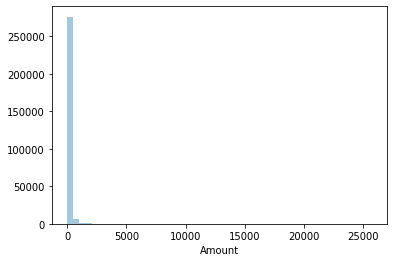

In [13]:
sns.distplot(df["Amount"], kde = False, norm_hist = False)
plt.show()

In [14]:
dffraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [15]:
dflegit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [16]:
dflegithours = dflegit.copy()
dflegithours['Time'] = dflegithours['Time']*0.00027777777777778
dffraudhours = dffraud.copy()
dffraudhours['Time'] = dffraudhours['Time']*0.00027777777777778

The places between the black stripes are nights and early mornings(00:00 - 07:30).

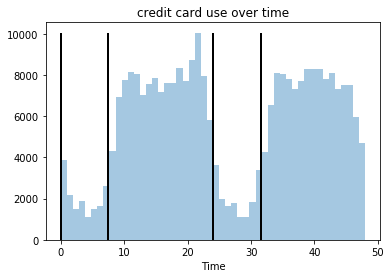

In [17]:
sns.distplot(dfhours['Time'], kde = False, norm_hist=False)
plt.title('credit card use over time')

plt.plot([0, 0], [0, 10000], linewidth=2, color = 'k')
plt.plot([7.5, 7.5], [0, 10000], linewidth=2, color = 'k')
plt.plot([24, 24], [0, 10000], linewidth=2, color = 'k')
plt.plot([31.5, 31.5], [0, 10000], linewidth=2, color = 'k')
plt.show()

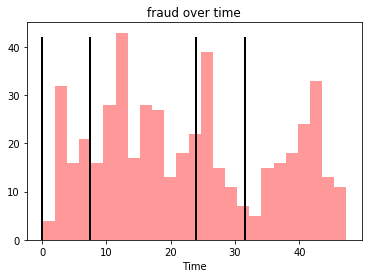

In [18]:
sns.distplot(dffraudhours['Time'], kde = False, norm_hist=False, color = 'r', bins=25)
plt.title('fraud over time')

plt.plot([0, 0], [0, 42], linewidth=2, color = 'k')
plt.plot([7.5, 7.5], [0, 42], linewidth=2, color = 'k')
plt.plot([24, 24], [0, 42], linewidth=2, color = 'k')
plt.plot([31.5, 31.5], [0, 42], linewidth=2, color = 'k')
plt.show()

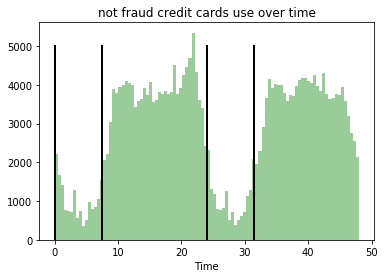

In [19]:
sns.distplot(dflegithours['Time'], kde = False, norm_hist=False, color = 'g', bins=100)
plt.title('not fraud credit cards use over time')

plt.plot([0, 0], [0, 5000], linewidth=2, color = 'k')
plt.plot([7.5, 7.5], [0, 5000], linewidth=2, color = 'k')
plt.plot([24, 24], [0, 5000], linewidth=2, color = 'k')
plt.plot([31.5, 31.5], [0, 5000], linewidth=2, color = 'k')
plt.show()

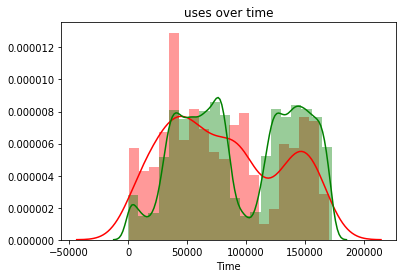

In [20]:
sns.distplot(dffraud['Time'], kde = True, color = 'r', bins=20)
sns.distplot(dflegit['Time'], kde = True, color = 'g', bins=20)
plt.title('uses over time')
plt.show()

In [39]:
y = df.Class
X = df.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [40]:
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, dummy_pred))

,0,1
0,85294,0
1,149,0


In [41]:
accuracy_score(y_test, dummy_pred)

0.9982561473731025

In [30]:
X = pd.concat([X_train, y_train], axis=1)
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]
fraud_upsampled = resample(fraud, replace=True, n_samples=len(not_fraud), random_state=27)
upsampled = pd.concat([not_fraud, fraud_upsampled])
upsampled.Class.value_counts()

1    213245
0    213245
Name: Class, dtype: int64

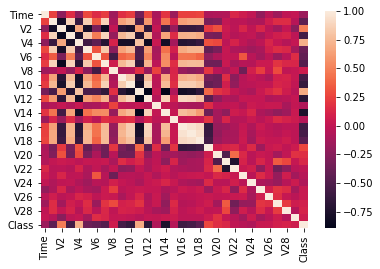

In [42]:
sns.heatmap(upsampled.corr())

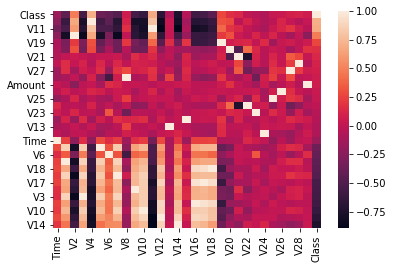

In [32]:
sns.heatmap(upsampled.corr().sort_values(by='Class', ascending=False))

In [33]:
upsampled.corr().sort_values(by='Class', ascending=False)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Class,-0.163651,-0.431656,0.488043,-0.563127,0.710692,-0.365756,-0.402237,-0.480326,0.058757,-0.552156,...,0.128156,-0.002222,-0.040368,-0.081143,0.032425,0.039882,0.088028,0.104868,0.058686,1.000000
V4,-0.222447,-0.608769,0.666752,-0.764710,1.000000,-0.566001,-0.437791,-0.700740,0.107434,-0.782297,...,-0.021685,0.103503,-0.003821,-0.075436,-0.010174,0.124088,0.016122,-0.049313,0.015911,0.710692
V11,-0.329995,-0.529423,0.614170,-0.711617,0.794045,-0.519921,-0.516850,-0.646430,0.172353,-0.697147,...,0.133165,0.008508,-0.048074,-0.096960,0.040671,0.119675,0.189250,0.060920,-0.034843,0.688522
V2,-0.219959,-0.787102,1.000000,-0.852467,0.666752,-0.784707,-0.299862,-0.838452,0.005160,-0.687661,...,0.044129,-0.019030,0.124319,-0.002940,0.118014,-0.024191,-0.132436,0.015878,-0.244564,0.488043
V19,-0.085565,-0.307975,0.217137,-0.307114,0.306729,-0.406738,-0.214991,-0.359942,0.206800,-0.324043,...,0.114832,0.138402,0.011270,0.143908,-0.152885,0.036357,0.060499,-0.001487,0.052976,0.271009
V20,-0.069623,-0.280059,0.308401,-0.330086,0.279352,-0.316613,-0.085580,-0.356619,-0.036627,-0.370889,...,-0.503854,0.412220,0.135846,-0.023392,0.036817,0.007971,-0.121806,0.005952,0.178448,0.165570
V21,-0.061445,0.009587,0.044129,0.024875,-0.021685,0.028557,0.015840,0.037979,-0.090583,0.157054,...,1.000000,-0.739325,0.109603,-0.033720,0.122137,0.018465,0.342466,0.270269,0.026003,0.128156
V28,-0.005971,0.159917,0.015878,0.106839,-0.049313,0.132513,-0.033013,0.126395,-0.001752,0.109255,...,0.270269,-0.221616,0.066934,-0.039185,0.151486,0.026907,0.228305,1.000000,-0.053838,0.104868
V27,-0.144247,0.156982,-0.132436,0.075633,0.016122,0.155797,-0.169993,0.185373,0.282383,0.091499,...,0.342466,-0.349635,-0.188356,-0.172395,0.192046,0.162821,1.000000,0.228305,0.063497,0.088028
V8,-0.147715,-0.105874,0.005160,-0.190315,0.107434,-0.231812,-0.569241,0.064611,1.000000,-0.087189,...,-0.090583,0.012301,-0.368781,0.084071,0.236043,0.031887,0.282383,-0.001752,0.018191,0.058757


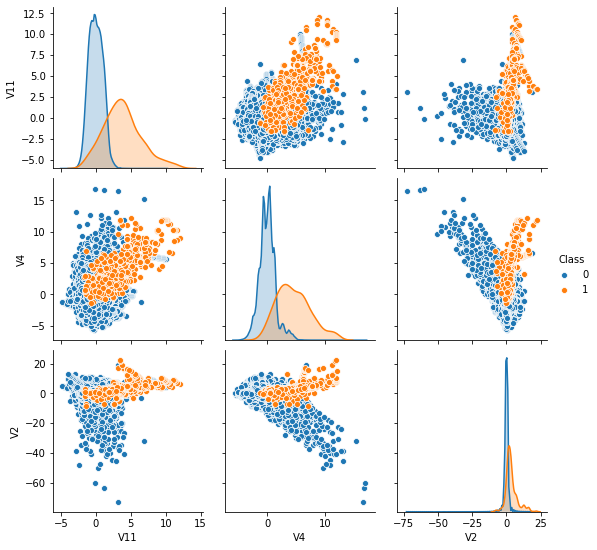

In [34]:
sns.pairplot(df, vars = ['V11', 'V4', 'V2'], hue = 'Class')

In [51]:
from sklearn.ensemble import RandomForestClassifier
    
rfc = RandomForestClassifier(max_depth=4, random_state=0)
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, rfc_predict))

,0,1
0,85286,8
1,42,107


In [52]:
accuracy_score(y_test, rfc_predict)

0.9994148145547324

In [54]:
recall_score(y_test, rfc_predict)

0.7181208053691275

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, knn_pred))

,0,1
0,85294,0
1,137,12


In [53]:
accuracy_score(y_test, knn_pred)

0.9983965918799668